# 导师制名企实训班商业智能方向 004期 Lesson 15

### Thinking 1: 逻辑回归的假设条件是怎样的？

逻辑回归的第一个基本假设是假设数据服从伯努利分布。
伯努利分布有一个简单的例子是抛硬币，抛中为正面的概率是$p$，抛中为负面的概率是$1 − p$。
在逻辑回归里假设$h_\theta(x)$为样本为正的概率，$1−h_\theta(x)$为样本为负的概率，那么模型可以描述为：
$$h_\theta\left(x;\theta \right )=p$$

逻辑回归的第二个假设是假设样本为正的概率是：
$$p=\frac{1}{1+e^{-\theta^{T} x}}$$
所以逻辑回归的最终形式 :
$$ h_\theta\left(x;\theta \right )=\frac{1}{1+e^{-\theta^{T} x}}$$

### Thinking 2: 逻辑回归的损失函数是怎样的？

假设样本输出时0或1，有：  
$$P(y=1|x,\theta )=h_\theta(x)$$
$$P(y=0|x,\theta )=1- h_\theta(x)$$
由此可得y的概率分布函数：
$$P(y|x,\theta )=h_\theta(x)^y(1-h_\theta(x))^{1-y}$$
可以用最大似然函数法求解模型系数$\theta$:
$$L(\theta )=\prod_{i=1}^m h_\theta(x)^{y_i}(1-h_\theta(x))^{1-y_i}$$
其中m为样本个数  
对似然函数取对数后就可以得到损失函数，再对损失函数取反：
$$J(\theta)=-logL(\theta)=-\sum_{i=1}^m(y_ilog(h_\theta(x_i))+(1-y_i)log(1-h_\theta(x_i)))$$
用矩阵表示法为：
$$J(\theta)=-Y^T\cdot logh_\theta(X)-(E-Y)^T\cdot log(E-h_\theta(X))$$
其中$E$为单位矩阵

### Thinking 3：逻辑回归如何进行分类？

逻辑回归作为一个回归(也就是y值是连续的)，如何应用到分类上去呢。y值确实是一个连续的变量。逻辑回归的做法是划定一个阈值，y值大于这个阈值的是一类，y值小于这个阈值的是另外一类。阈值具体如何调整根据实际情况选择。一般会选择0.5做为阈值来划分。

### Thinking 4：为什么在训练中需要将高度相关的特征去掉？

1. 去掉高度相关的特征会让模型的可解释性更好。
2. 可以大大提高训练的速度。如果模型当中有很多特征高度相关的话，就算损失函数本身收敛了，但实际上参数是没有收敛的，这样会拉低训练的速度。其次是特征多了，本身就会增大训练的时间。

### Action 1：基于评分卡的风控模型开发
数据集GiveMeSomeCredit，15万样本数据  
https://www.kaggle.com/c/GiveMeSomeCredit/data  
使用WOE进行特征变换，IV进行特征筛选，LR构建风控模型，并对模型评分规则进行可解释性说明   
–基本属性：包括了借款人当时的年龄  
– 偿债能力：包括了借款人的月收入、负债比率  
– 信用往来：两年内35-59天逾期次数、两年内60-89天逾期次数、两年内90天或高于90天逾期的次数  
– 财产状况：包括了开放式信贷和贷款数量、不动产贷款或额度数量。  
– 其他因素：包括了借款人的家属数量  

### Step1，数据探索性分析

In [1]:
import pandas as pd

In [2]:
# 数据加载
df_train = pd.read_csv('data/cs-training.csv')
df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
# 去掉第一列
df_train = df_train.iloc[:,1:]
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df_train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

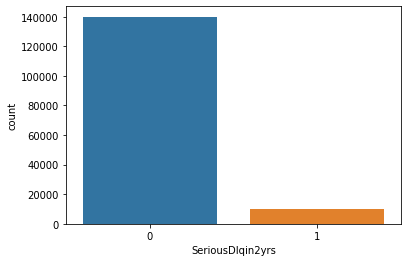

In [5]:
# 违约率SeriousDlqin2yrs进行可视化
import seaborn as sns
sns.countplot(x='SeriousDlqin2yrs', data=df_train)

In [6]:
# 查看SeriousDlqin2yrs字段比例
df_train['SeriousDlqin2yrs'].sum()/len(df_train)

0.06684

### Step2，数据缺失值填充，采用简单规则，如使用中位数进行填充

In [7]:
# 查看缺失值
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

/home/wll/anaconda3/envs/torch/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines', ylabel='Density'>

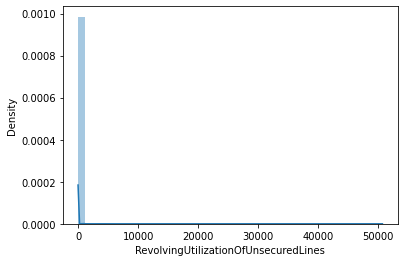

In [9]:
# 直方图分布
sns.distplot(df_train['RevolvingUtilizationOfUnsecuredLines'])

In [10]:
# 均值
df_train.mean()

SeriousDlqin2yrs                           0.066840
RevolvingUtilizationOfUnsecuredLines       6.048438
age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

In [11]:
# 中位数
df_train.median()

SeriousDlqin2yrs                           0.000000
RevolvingUtilizationOfUnsecuredLines       0.154181
age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [12]:
# 使用中位数进行缺失值填充
df_train = df_train.fillna(df_train.median())
df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Step3，变量分箱

#### 数据分箱
1. 对于age字段，分成6段

[-math.inf, 25, 40, 50, 60, 70, math.inf]   

2. 对于NumberOfDependents（家属人数）字段，分成6段

[-math.inf,2,4,6,8,10,math.inf]  

3. 对于3种逾期次数，即NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate，分成10段

[-math.inf,1,2,3,4,5,6,7,8,9,math.inf]    

4. 对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段

In [13]:
# 将age字段进行分箱
import math
age_bins = [-math.inf, 25, 40, 50, 60, 70, math.inf]
df_train['bin_age'] = pd.cut(df_train['age'], bins=age_bins)
df_train[['age', 'bin_age']].head()

,age,bin_age
0,45,"(40.0, 50.0]"
1,40,"(25.0, 40.0]"
2,38,"(25.0, 40.0]"
3,30,"(25.0, 40.0]"
4,49,"(40.0, 50.0]"


In [14]:
# 对家属人数字段进行分箱
dependent_bins = [-math.inf,2,4,6,8,10,math.inf]
df_train['bin_NumberOfDependents'] = pd.cut(df_train['NumberOfDependents'], bins=dependent_bins)
df_train[['NumberOfDependents', 'bin_NumberOfDependents']].head()

,NumberOfDependents,bin_NumberOfDependents
0,2.0,"(-inf, 2.0]"
1,1.0,"(-inf, 2.0]"
2,0.0,"(-inf, 2.0]"
3,0.0,"(-inf, 2.0]"
4,0.0,"(-inf, 2.0]"


In [15]:
# 对于3种逾期次数，即
#NumberOfTime30-59DaysPastDueNotWorse，
#NumberOfTime60-89DaysPastDueNotWorse，
#NumberOfTimes90DaysLate，分成10段
dpd_bins = [-math.inf,1,2,3,4,5,6,7,8,9,math.inf]
df_train['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=dpd_bins)
df_train['bin_NumberOfTimes90DaysLate'] = pd.cut(df_train['NumberOfTimes90DaysLate'], bins=dpd_bins)

In [16]:
# 查看分箱情况
df_train[['bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTime60-89DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate']]

,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate
0,"(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]"
1,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
2,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
3,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
4,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
...,...,...,...
149995,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149996,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149997,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"
149998,"(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]"


In [17]:
# 对于其余字段，即RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines 分成5段
df_train['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.qcut(df_train['RevolvingUtilizationOfUnsecuredLines'], q=5, duplicates='drop')
df_train['bin_DebtRatio'] = pd.qcut(df_train['DebtRatio'], q=5, duplicates='drop')
df_train['bin_MonthlyIncome'] = pd.qcut(df_train['MonthlyIncome'], q=5, duplicates='drop')
df_train['bin_NumberOfOpenCreditLinesAndLoans'] = pd.qcut(df_train['NumberOfOpenCreditLinesAndLoans'], q=5, duplicates='drop')
df_train['bin_NumberRealEstateLoansOrLines'] = pd.qcut(df_train['NumberRealEstateLoansOrLines'], q=5, duplicates='drop')
loans_bins = [-math.inf,0,1,2,3,math.inf]
df_train['bin_NumberRealEstateLoansOrLines'] = pd.cut(df_train['NumberRealEstateLoansOrLines'], bins=loans_bins)
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,bin_age,bin_NumberOfDependents,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,"(40.0, 50.0]","(-inf, 2.0]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(0.468, 4.0]","(8250.0, 3008750.0]","(12.0, 58.0]","(3.0, inf]"
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.271, 0.699]","(-0.001, 0.134]","(-0.001, 3400.0]","(-0.001, 4.0]","(-inf, 0.0]"
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,"(25.0, 40.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.0832, 0.271]","(-0.001, 0.134]","(-0.001, 3400.0]","(4.0, 6.0]","(-inf, 0.0]"
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,"(40.0, 50.0]","(-inf, 2.0]","(-inf, 1.0]","(-inf, 1.0]","(-inf, 1.0]","(0.699, 50708.0]","(-0.001, 0.134]","(8250.0, 3008750.0]","(6.0, 9.0]","(0.0, 1.0]"


In [18]:
# 统计分箱字段
bin_cols = [c for c in df_train.columns.values if c.startswith('bin_')]
bin_cols

['bin_age',
 'bin_NumberOfDependents',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTime60-89DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_RevolvingUtilizationOfUnsecuredLines',
 'bin_DebtRatio',
 'bin_MonthlyIncome',
 'bin_NumberOfOpenCreditLinesAndLoans',
 'bin_NumberRealEstateLoansOrLines']

### Step4，特征筛选

In [19]:
import numpy as np
# 计算IV， 衡量变量的预测能力
def cal_IV(df, feature, target):
    lst = []
    cols = ['Variable', 'Value', 'All', 'Bad']
    # 对feature字段中的每个分箱取值进行遍历
    for i in range(df[feature].nunique()):
        # 得到feature字段的第i个分箱取值val
        val = list(df[feature].unique())[i]
        # 统计feature, feature_value, 这个value的个数，这个value导致target=1的个数
        lst.append([feature, val, df[df[feature]==val].count()[feature], df[(df[feature]==val) & (df[target]==1)].count()[feature]])
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]
    # 这个value所占比例
    data['Share'] = data['All'] / data['All'].sum()
    # 这个value导致bad情况，在该value个数的比例
    data['Bad Rate'] = data['Bad'] / data['All']
    # Margin Bad
    data['Margin Bad'] = data['Bad'] / data['Bad'].sum()
    # Margin Good
    data['Margin Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['woe'] = np.log(data['Margin Bad'] / data['Margin Good'])
    data['iv'] = (data['woe'] * (data['Margin Bad'] - data['Margin Good'])).sum()
    # 按照Variable，Value进行排序
    data.sort_values(by=['Variable', 'Value'])
    return data['iv'].values[0]

In [20]:
cal_IV(df_train, 'bin_age', 'SeriousDlqin2yrs')

0.24041120302785982

In [21]:
# 计算每个字段的IV值
for f in bin_cols:
    print(f, cal_IV(df_train, f, 'SeriousDlqin2yrs'))

bin_age 0.24041120302785982
bin_NumberOfDependents 0.01450836007644442
bin_NumberOfTime30-59DaysPastDueNotWorse 0.492444774570198
bin_NumberOfTime60-89DaysPastDueNotWorse 0.2665587583516951
bin_NumberOfTimes90DaysLate 0.49160685733515563
bin_RevolvingUtilizationOfUnsecuredLines 1.0596188771423887
bin_DebtRatio 0.05948761145809681
bin_MonthlyIncome 0.05623446147714756
bin_NumberOfOpenCreditLinesAndLoans 0.04802315528985505
bin_NumberRealEstateLoansOrLines 0.06167337290177645


## 只选择iv>0.1的，入选字段有5个：
* bin_age
* bin_NumberOfTime30-59DaysPastDueNotWorse
* bin_NumberOfTime60-89DaysPastDueNotWorse
* bin_NumberOfTimes90DaysLate
* bin_RevolvingUtilizationOfUnsecuredLines

In [22]:
feature_cols = ['bin_age', 
                'bin_NumberOfTime30-59DaysPastDueNotWorse',
                'bin_NumberOfTime60-89DaysPastDueNotWorse',
                'bin_NumberOfTimes90DaysLate',
                'bin_RevolvingUtilizationOfUnsecuredLines']

### Step5，对于筛选出来的特征，计算每个bin的WOE值

In [40]:
def cal_WOE(df, features, target):
    df_new = df.copy()
    for f in features:
        df_woe = df_new.groupby(f).agg({target:['sum','count']})
        df_woe.columns = list(map(''.join, df_woe.columns.values))
        df_woe = df_woe.reset_index()
        df_woe = df_woe.rename(columns = {target+'sum':'bad', target+'count':'all'})
        df_woe['good'] = df_woe['all'] - df_woe['bad']
        df_woe['margin bad'] = df_woe['bad'] / df_woe['bad'].sum()
        df_woe['margin good'] = df_woe['good'] / df_woe['good'].sum()
        # log1p可以避免分母为0的情况
        df_woe['woe'] = np.log1p(df_woe['margin bad'] / df_woe['margin good'])
        df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
        df_new = df_new.merge(df_woe, on=f, how='left')
    return df_new

In [34]:
# 计算这些特征的woe
df_woe = cal_WOE(df_train, bin_cols, 'SeriousDlqin2yrs')
df_woe.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,good_bin_NumberOfOpenCreditLinesAndLoans,margin bad_bin_NumberOfOpenCreditLinesAndLoans,margin good_bin_NumberOfOpenCreditLinesAndLoans,woe_bin_NumberOfOpenCreditLinesAndLoans,bad_bin_NumberRealEstateLoansOrLines,all_bin_NumberRealEstateLoansOrLines,good_bin_NumberRealEstateLoansOrLines,margin bad_bin_NumberRealEstateLoansOrLines,margin good_bin_NumberRealEstateLoansOrLines,woe_bin_NumberRealEstateLoansOrLines
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,...,25838,0.184121,0.184591,0.691873,419,3652,3233,0.041791,0.023097,1.032961
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,...,30556,0.309495,0.218298,0.882845,4672,56188,51516,0.465988,0.368040,0.818076
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,...,24972,0.156892,0.178405,0.630962,4672,56188,51516,0.465988,0.368040,0.818076
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,...,35145,0.201177,0.251082,0.588475,2748,52338,49590,0.274087,0.354280,0.573037


In [35]:
feature_cols = ['age', 
                'NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberOfTimes90DaysLate',
                'RevolvingUtilizationOfUnsecuredLines']

In [36]:
# 得到woe规则 features, bin, woe
df_bin_to_woe = pd.DataFrame(columns = ['features', 'bin', 'woe'])
for f in feature_cols:
    b = 'bin_'+f
    w = 'woe_bin_'+f
    df = df_woe[[w,b]].drop_duplicates()
    df.columns = ['woe','bin']
    df['features'] = f
    df_bin_to_woe = pd.concat([df_bin_to_woe, df])
df_bin_to_woe.head()

,features,bin,woe
0,age,"(40.0, 50.0]",0.813822
1,age,"(25.0, 40.0]",0.955231
5,age,"(70.0, inf]",0.279404
6,age,"(50.0, 60.0]",0.651655
15,age,"(60.0, 70.0]",0.406848


### Step6，使用逻辑回归进行建模

In [37]:
woe_cols = [c for c in list(df_woe.columns.values) if 'woe' in c]
woe_cols

['woe_bin_age',
 'woe_bin_NumberOfDependents',
 'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
 'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
 'woe_bin_NumberOfTimes90DaysLate',
 'woe_bin_RevolvingUtilizationOfUnsecuredLines',
 'woe_bin_DebtRatio',
 'woe_bin_MonthlyIncome',
 'woe_bin_NumberOfOpenCreditLinesAndLoans',
 'woe_bin_NumberRealEstateLoansOrLines']

In [38]:
# 数据集切分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_woe[woe_cols], df_woe['SeriousDlqin2yrs'], test_size=0.2, random_state=33)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
model = LogisticRegression(random_state=33).fit(x_train, y_train)
y_pred = model.predict(x_test)
print('accuracy_score:',accuracy_score(y_pred, y_test))
print('roc_auc_score:',roc_auc_score(y_pred, y_test))

accuracy_score: 0.9361
roc_auc_score: 0.7711361926102505
